## Initialize
Import packages

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score, normalized_mutual_info_score

from keras.models import Model
from keras.layers import Input, Dense
from umap.umap_ import UMAP

Read in train dataset

In [16]:
train_data = pd.read_csv('train.dat', sep=',', header=None)

In [17]:
X_train = train_data.iloc[:, :-1].values

## Proprocessing

### Standardization

Transform the data into standard normally distributed data

In [18]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X_train)

## Normalization

Normalize the samples

In [19]:
normalizer = Normalizer()
X_normal = normalizer.fit_transform(X_standard)

## Feature Reduction

Extract k features

In [20]:
umap = UMAP(n_components=10, random_state=0)
X_umap = umap.fit_transform(X_normal)

## Model Training
Try different models

In [23]:
methods = ['K-means', 'GaussianMixture', 'Agglomerative']
clustering_methods = [KMeans(n_clusters=115, random_state=0),
                      GaussianMixture(n_components=115, covariance_type='full', random_state=0),
                      AgglomerativeClustering(n_clusters=115)]

In [24]:
silhouette_scores = []
for method in clustering_methods:
    labels = method.fit_predict(X_umap)
    silhouette = silhouette_score(X_umap, labels)
    silhouette_scores.append(silhouette)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
ch_scores = []
for method in clustering_methods:
    labels = method.fit_predict(X_umap)
    ch_score = calinski_harabasz_score(X_umap, labels)
    ch_scores.append(ch_score)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Output
Output silhouette results to plot

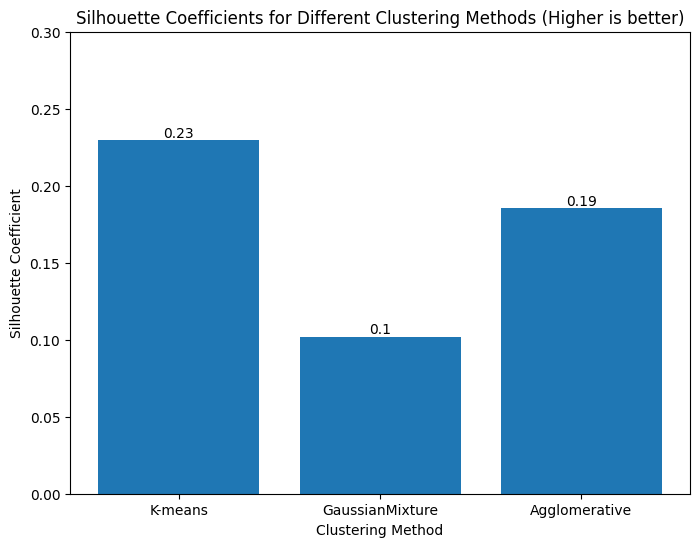

In [34]:
plt.figure(figsize=(8, 6))
plt.bar(methods, silhouette_scores)
plt.title('Silhouette Coefficients for Different Clustering Methods (Higher is better)')
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Coefficient')
plt.ylim(0, 0.3)

for i, score in enumerate(silhouette_scores):
    plt.text(i, score, round(score, 2), ha='center', va='bottom')
    
plt.show()

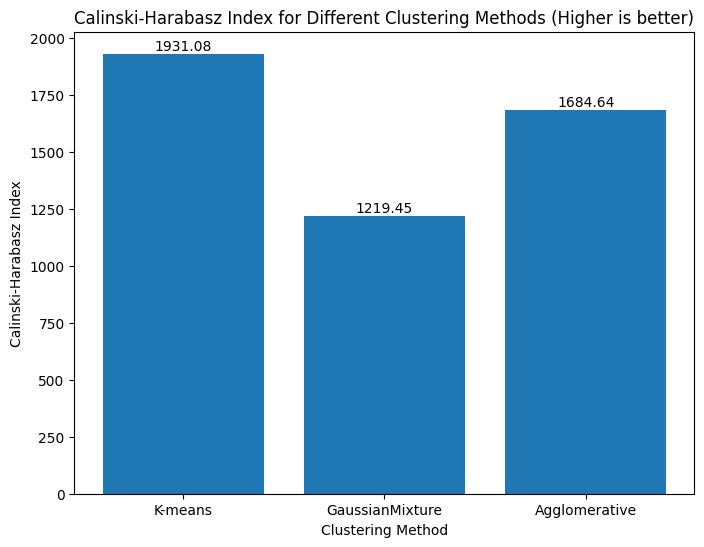

In [35]:
plt.figure(figsize=(8, 6))
plt.bar(methods, ch_scores)
plt.title('Calinski-Harabasz Index for Different Clustering Methods (Higher is better)')
plt.xlabel('Clustering Method')
plt.ylabel('Calinski-Harabasz Index')
plt.ylim(bottom=0)
for i, score in enumerate(ch_scores):
    plt.text(i, score, round(score, 2), ha='center', va='bottom')
plt.show()